In [7]:
import pandas as pd
import numpy as np
from time import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.feature_extraction import text
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
import os

In [8]:
data_set_file = "./Participants_Data_TWC/train.csv"
dataset = pd.read_csv(data_set_file)
dataset.head(10)

,Image,Label
0,YGP5FW.jpg,0
1,R5BWPN.jpg,0
2,ESROUO.jpg,0
3,4CYU0L.jpg,0
4,3WG532.jpg,0
5,JEKMM5.jpg,0
6,X47W89.jpg,0
7,NPFFN3.jpg,1
8,F2HFGX.jpg,0
9,C5P64S.jpg,1


Text(0.5, 1.0, 'Class Distribution')

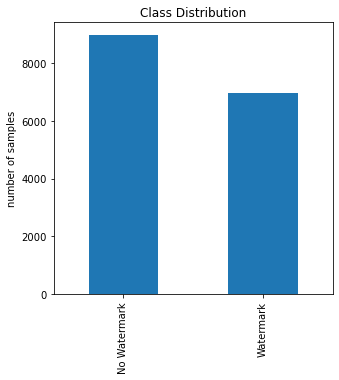

In [9]:
plt.figure(figsize=(5,5))
dataset['Label'].value_counts().plot(kind='bar')
plt.xticks([0,1],["No Watermark", "Watermark"])
plt.ylabel('number of samples')
plt.title("Class Distribution")

In [10]:

def to_vector(dataset):
    train, test = train_test_split(dataset, test_size=0.2)
    X_train = []
    y_train = []
    t0 = time()
    for image, target in zip(train.Image.tolist(), train.Label.tolist()):
        img_array = imread(os.path.join('./Participants_Data_TWC/train',image))
        X_train.append(img_array.flatten())
        y_train.append(target)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    duration_train = time()-t0
    
    
    t0 = time()
    X_test = []
    y_test = []
    for image, target in zip(test.Image.tolist(), test.Label.tolist()):
        img_array = imread(os.path.join('./Participants_Data_TWC/train',image))
        X_test.append(img_array.flatten())
        y_test.append(target)
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    duration_test = time()-t0

    # feature_name = vectorizer.get_feature_names_out()
    print(f"{len(dataset.Image)} documents ")
    print(f"vectorize training done in {duration_train:.3f}s")
    print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")

    print(f"vectorize testing done in {duration_test:.3f}s")
    print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, y_train, X_test, y_test


In [11]:
X_train, y_train, X_test, y_test = to_vector(dataset=dataset)

15933 documents 
vectorize training done in 118.491s
n_samples: 12746, n_features: 786432
vectorize testing done in 12.384s
n_samples: 3187, n_features: 786432


In [12]:
clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(X_train, y_train)


: 

: 

In [ ]:
pred = clf.predict(X_test)
print("accuracy_score :- ", accuracy_score(y_test, pred))
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.set_title(f"Confusion Matrix for {clf.__class__.__name__}\non the original documents")
ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
print(f"{classification_report(y_test,pred,zero_division=0)}\n")